# **Лабораторная работа №3**

Выполнили Копалина Майя и Кузенина Валерия P3232

Вариант 1




# Задание 1

С помощью критерия согласия Пирсона хи-квадрат проверить согласованность индекса массы тела с нормальным законом(формализовать основные и альтернативные гипотезы)


Гипотезы:

$H_1$ = {bmi соответствует нормальному закону распределению}

$H_2 $ = {bmi не соответствует нормальному закону }

Количество интервалов возьмём k = 10.

Уровень значимости положим $\epsilon$ = 0.05. По таблице распределения $\chi^2_9$ найдём С. Согласно которому будем определять какую гипотезу принимает критерий $\delta(\vec{X})$


мат.ожидание: 30.66339686098655 дисперсия: 6.0959076415894256
статистика критерия : 15.527092416878093
Критическая точка со степенью свободы - 9 и уровнем значимости - 0.05 : 16.918977604620448
Не отвергаем основную гипотезу: распределение ИМТ соответствует нормальному закону.


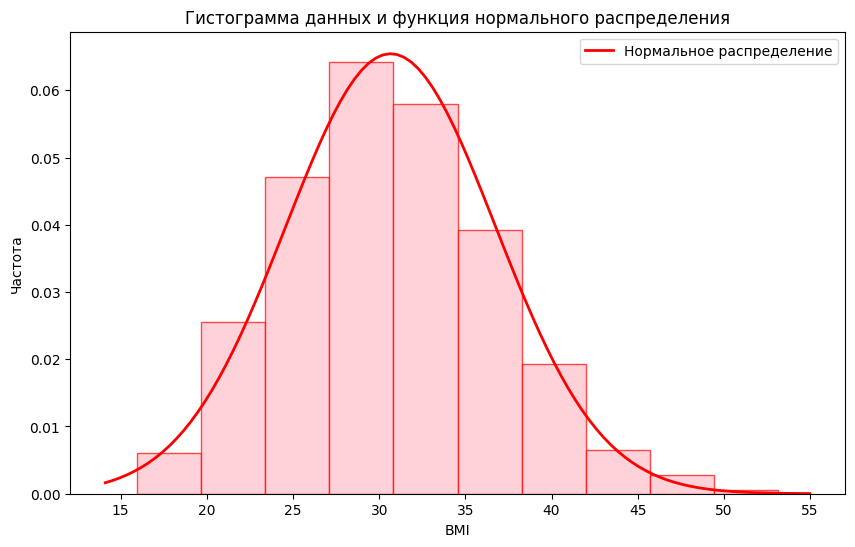

Статистика теста Колмогорова-Смирнова: 0.02613962682509635
p-значение: 0.31453976932347394
Не отвергаем нулевую гипотезу: данные соответствуют нормальному распределению.


In [ ]:

import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, chi2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import kstest

# Загрузка данных из файла
data = pd.read_csv('sex_bmi_smokers.csv')

# Оценка параметров нормального распределения по данным
mean, dev = np.mean(data['bmi']), np.std(data['bmi'])
print(f"мат.ожидание: {mean} дисперсия: {dev}")
n=len(data)


num_intervals = 10

# Разбиение данных на интервалы
hist, bins = np.histogram(data['bmi'], bins=num_intervals)

expected_freq = [len(data) * (norm.cdf(bins[i + 1], loc=mean, scale=dev) - norm.cdf(bins[i], loc=mean, scale=dev)) for i in range(num_intervals)]

# Рассчет наблюдаемых частот
observed_freq = hist

# Рассчет статистики хи-квадрат
chi_square_statistic = np.sum((observed_freq - expected_freq) ** 2 / expected_freq)
print(f"статистика критерия : {chi_square_statistic}")

df = num_intervals - 1 # Степени свободы
epsilon = 0.05
c = chi2.ppf(1-epsilon, df)
print(f"Критическая точка со степенью свободы - {df} и уровнем значимости - {epsilon} : {c}")


if chi_square_statistic < c:
  print("Не отвергаем основную гипотезу: распределение ИМТ соответствует нормальному закону.")
else:
  print("Отвергаем основную гипотезу: распределение ИМТ не соответствует нормальному закону.")

plt.figure(figsize=(10, 6))

# Построение гистограммы данных
plt.hist(data['bmi'], bins=num_intervals, color='pink', edgecolor='red', alpha=0.7, density=True)
# Построение функции нормального распределения
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, dev)
plt.plot(x, p, color='red', linewidth=2, label='Нормальное распределение')

plt.xlabel('BMI')
plt.ylabel('Частота')
plt.title('Гистограмма данных и функция нормального распределения')
plt.legend()

plt.show()

# Проведение теста Колмогорова
kstest_statistic, p_value = kstest(data['bmi'], 'norm', args=(mean, dev))
alpha = 0.05

print(f"Статистика теста Колмогорова-Смирнова: {kstest_statistic}")
print(f"p-значение: {p_value}")

if p_value > alpha:
    print("Не отвергаем нулевую гипотезу: данные соответствуют нормальному распределению.")
else:
    print("Отвергаем нулевую гипотезу: данные не соответствуют нормальному распределению.")


# Задание 2

С помощью критерия однородности хи-квадрат проверить однородность индекса массы тела курящих и некурящих (формализовать $H_0$ и $H_1$, реализовать самостоятельно). Ту же самую задачу решить с помощью другого критерия (тоже формализовать гипотезы, но здесь можно воспользоваться готовой реализацией).

Однородность проверить по критерию Стьюдента!


Далее, сформулируем гипотезы для критерия Стьюдента:

- Нулевая гипотеза $H_0$: Средние значения ИМТ у курящих и некурящих равны. $ \mu_{курящих} = \mu_{некурящих} $ \\
- Альтернативная гипотеза $H_1$: Средние значения ИМТ у курящих и некурящих не равны.  $ \\ \mu_{курящих} ≠ \mu_{некурящих} $

Критерий Стьюдента при двусторонней альтернативе:

$\delta({X}, {Y}) =
\begin{cases}
  H_0, если \ |\rho({X}, {Y})| < C\\
  H_1, если \ |\rho({X}, {Y})| \ge C, \\
\end{cases}$
где $C = \tau_{1-\epsilon/2} $ - квантиль распределения $T_{n+m-2}$

𝑡--статистика для проверки нулевой гипотезы равна $$t_{n_1+n_2-2} = \sqrt{\frac{n_1n_2}{n_1+n_2} } \frac{𝑋_1 − 𝑋_2}{\sqrt{\frac{(n_1-1)(s_0^2(X_1))+(n_2-1)(s_0^2(X_2))}{n_1+n_2-2} }} $$
- $𝑋_1$ и $𝑋_2$  - выборочные средние для двух выборок,
- $S$ - объединенное стандартное отклонение (объединенная выборочная дисперсия),
- $𝑛_1$ и $𝑛_2$ - размеры выборок для двух групп соответственно.


t-статистика, как правило, используется для проверки гипотез о разнице между средними двух выборок. Её распределение приближается к стандартному нормальному распределению при больших объемах выборок, что делает её использование удобным для проверки статистических гипотез.

Почему степени свободы в t-статистике равны $𝑛 + 𝑚 − 2$ :

- Независимость от $𝑋_1$ и $𝑋_2$ : Фактически,  $𝑋_1$ и $𝑋_2$ (выборочные средние) влияют на значение t-статистики через разницу между ними ($𝑋_1$ - $𝑋_2$), но они не влияют на степени свободы. Степени свободы в t-статистике зависят только от размеров выборок ($𝑛_1$ и $𝑛_2$) и оценки стандартного отклонения (s), которая включает в себя дисперсии обеих выборок.


- Степени свободы $𝑛 + 𝑚 − 2$: Количество степеней свободы в t-распределении вычисляется как сумма степеней свободы каждой из оценок дисперсии, использованных для вычисления оценки стандартного отклонения. В данном случае это $(𝑛_1-1)$ и $(𝑛_2-1)$, соответственно, так как для оценки дисперсии используется выборочное стандартное отклонение. Таким образом, степени свободы равны
$(𝑛_1-1)+(𝑛_2−1)= (𝑛_1+𝑛_2-2)= (𝑛+𝑚−2)$.


Для проверки гипотезы о равенстве дисперсий сначала используем критерий Фишера. Мы вычислим дисперсионное отношение $\frac{S_0^2({X_1})}{S_0^2({X_2})}$ и сравним его с критическим значением $C$ таблицы распределения Фишера. Если дисперсионное отношение меньше критического значения, то мы не можем отвергнуть гипотезу о равенстве дисперсий.

После того, как мы убедимся в равенстве дисперсий, мы сможем перейти к вычислению статистики Стьюдента для дальнейшего анализа данных.


In [ ]:
import pandas as pd
from scipy.stats import t, f
from scipy.stats import mannwhitneyu

# Загрузка данных из файла
data = pd.read_csv('/content/sample_data/sex_bmi_smokers.csv')

# Выделение выборок ИМТ для курящих и некурящих
smokers_bmi = data[data['smoker'] == 'yes']['bmi']
non_smokers_bmi = data[data['smoker'] == 'no']['bmi']

# Вычисление средних значений для выборок
mean_smokers = smokers_bmi.mean()
mean_non_smokers = non_smokers_bmi.mean()

# Вычисление объединенной выборочной дисперсии
n = len(smokers_bmi)
m = len(non_smokers_bmi)

# Ищем несмещенные дисперсии
def disp(x, x_mean):
  s = sum((x_i - x_mean)**2 for x_i in x)
  return s/(len(x) - 1)

# Вычисление выборочных дисперсий для выборок
var_smokers = disp(smokers_bmi, mean_smokers)
var_non_smokers = disp(non_smokers_bmi, mean_non_smokers)
crit_value = f.ppf(1-0.05, n, m)
if (var_non_smokers/var_smokers < crit_value):
  print("Нет оснований отрицать гипотезу равенства дисперсий")
  print(var_smokers, var_non_smokers)
else:
  print("Гипотеза равенства дисперсий не верна. Далее нет смысла рассматривать критерий однородности.")

s_pooled = ((n - 1) * var_smokers + (m - 1) * var_non_smokers) / (n + m - 2)

# Вычисление t-статистики
# Это число, которое показывает, насколько средние значения различаются между группами.
t_statistic = (mean_smokers - mean_non_smokers) / (s_pooled * ((1 / n) + (1 / m)) ** 0.5)

# Определение критического значения t-статистики для заданного уровня значимости (например, α=0.05) и степеней свободы df=n+m-2
alpha = 0.05
df = n + m - 2
t_critical = t.ppf(1 - alpha / 2, df)

# Вычисление p-значения
# Вероятность получить такое или более экстремальное значение t-статистики (абсолютное значение)
p_value = 2 * (1 - t.cdf(abs(t_statistic), df))

# Вывод результатов
print("t-статистика:", t_statistic)
print("Критическое значение:", t_critical)
print("p-значение:", p_value)

# Проверка статистической значимости
# Если p-значение меньше выбранного уровня значимости, нулевая гипотеза отвергается в пользу альтернативной гипотезы.
if abs(t_statistic) > t_critical:
    print("Отвергаем нулевую гипотезу о равенстве средних - наличие различий между средними значениями ИМТ у курящих и некурящих.")
else:
    print("Принимаем нулевую гипотезу о равенстве средних - отсутствие различий между средними значениями ИМТ у курящих и некурящих.")

# Тест Манна-Уитни
t_statistic, p_value = mannwhitneyu(smokers_bmi, non_smokers_bmi, alternative='two-sided')
# Проверка гипотез по Манна-Уитни
if p_value > alpha:
    print("Принимаем гипотезу H_0 о равенстве средних.")
else:
    print("Принимаем гипотезу H_1 о неравенстве средних.")

Нет оснований отрицать гипотезу равенства дисперсий
39.92526177943107 36.519195269364644
t-статистика: 0.022471223613158516
Критическое значение: 1.9617412190546957
p-значение: 0.9820754220247152
Принимаем нулевую гипотезу о равенстве средних - отсутствие различий между средними значениями ИМТ у курящих и некурящих.
Принимаем гипотезу H_0 о равенстве средних.


В обоих случаях p_value < 0.05, следовательно нулевая гипотеза о их однородности (схожести распределений и вариативности) принимается.


Построим графики распределения для двух выборок. Если медианы будут находиться примерно на одном уровне, то значит обе выборки однородны и имеют похожие распределения.

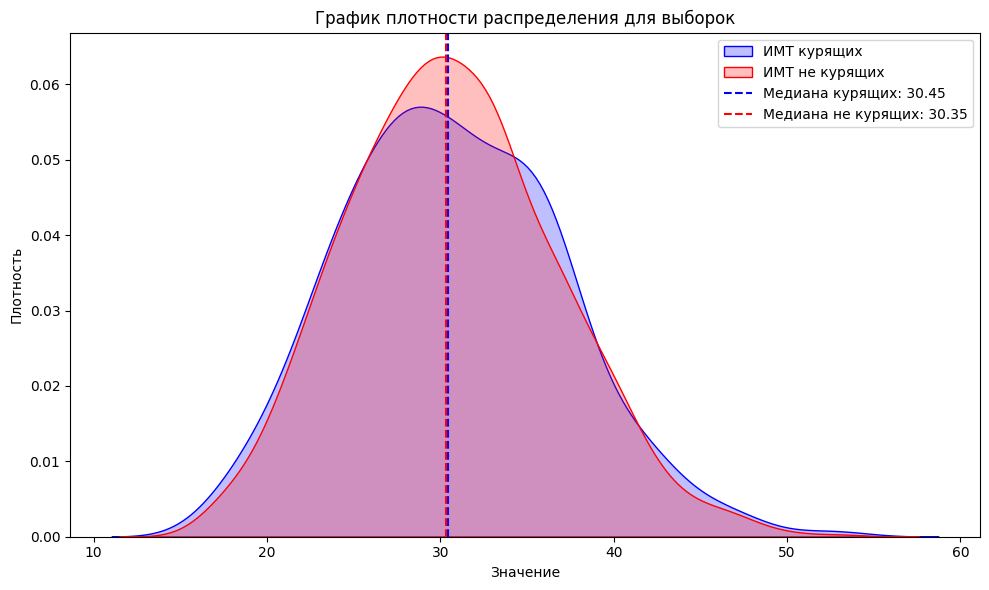

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Создаем данные для примера
smokers_bmi = dataset[dataset['smoker'] == 'yes']['bmi']
non_smokers_bmi = dataset[dataset['smoker'] == 'no']['bmi']

# Создаем подграфик
fig, ax = plt.subplots(figsize=(10, 6))

# График плотности распределения
sns.kdeplot(smokers_bmi, label='ИМТ курящих', fill=True, color='blue')

sns.kdeplot(non_smokers_bmi, label='ИМТ не курящих', fill=True, color='red')

ax.set_xlabel('Значение')
ax.set_ylabel('Плотность')
ax.set_title('График плотности распределения для выборок')
ax.legend()

# Добавляем медиану и другие параметры на график
median_smokers = np.median(smokers_bmi)
median_non_smokers = np.median(non_smokers_bmi)

ax.axvline(median_smokers, color='blue', linestyle='--', label=f'Медиана курящих: {median_smokers:.2f}')
ax.axvline(median_non_smokers, color='red', linestyle='--', label=f'Медиана не курящих: {median_non_smokers:.2f}')
ax.legend()

plt.tight_layout()
plt.show()


# Задание 3

С помощью критерия независимости хи-квадрат проверить независимость индекса массы тела и пола (формализовать $Н_0$ и $Н_1$, реализовать самостоятельно).



- Нулевая гипотеза $H_0$ = { Индекс массы тела и пол независимы}
- Альтернативная гипотеза $H_1$ = { Индекс массы тела и пол зависимы.}

In [ ]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import chi2
from scipy.stats import norm
from scipy import stats
import math

data = pd.read_csv('sex_bmi_smokers.csv')

num_intervals = 10

hist, bins = np.histogram(data['bmi'], bins=num_intervals)
crosstab_table = pd.crosstab(pd.cut(data['bmi'], bins=num_intervals), data['sex'])
print(crosstab_table)
observed = crosstab_table.values
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
total = observed.sum()
expected = np.outer(row_totals, col_totals) / total
chi2_stat = np.sum((observed - expected)**2 / expected)
print(chi2_stat)

# Определение степеней свободы
df = (observed.shape[0] - 1) * (observed.shape[1] - 1)

epsilon = 0.05
chi_real = scipy.stats.chi2.ppf(1 - epsilon, num_intervals-1, 1)
print(f"Критическая точка со степенью свободы - {df} и уровнем значимости - {epsilon} : {chi_real}")


if chi2_stat < chi_real:
  print("Принимает нулевую гипотезу: пол и индекс массы тела независимы.")
else:
  print("Принимает альтернативную гипотезу:пол и индекс массы тела зависимы")


5.973088177680321
Критическая точка со степенью свободы - 9 и уровнем значимости - 0.05 : 17.918977604620448
Принимает нулевую гипотезу: пол и индекс массы тела независимы.


In [ ]:
from scipy.stats import ks_2samp

# KS-тест (Колмогорова-Смирнова) для сравнения двух выборок
ks_stat, ks_p_value = ks_2samp(data[dataset['sex'] == 'male']['bmi'], dataset[dataset['sex'] == 'female']['bmi'])
print("KS-тест:")
print(f"Статистика KS: {ks_stat}")
print(f"P-значение: {ks_p_value}")
if ks_p_value > epsilon:
    print("Принимает нулевую гипотезу.")
else:
    print("Принимает альтернативную гипотезу.")

# Тест Манна-Уитни для независимых выборок
mannwhitneyu_stat, mannwhitneyu_p_value = mannwhitneyu(dataset[dataset['sex'] == 'male']['bmi'], dataset[dataset['sex'] == 'female']['bmi'])
print("\nТест Манна-Уитни:")
print(f"Статистика U Манна-Уитни: {mannwhitneyu_stat}")
print(f"P-значение: {mannwhitneyu_p_value}")
if mannwhitneyu_p_value > epsilon:
    print("Принимает нулевую гипотезу.")
else:
    print("Принимает альтернативную гипотезу.")


KS-тест:
Статистика KS: 0.05926991901893133
P-значение: 0.1803102096437827
Принимает нулевую гипотезу.

Тест Манна-Уитни:
Статистика U Манна-Уитни: 235332.0
P-значение: 0.10140128040285443
Принимает нулевую гипотезу.


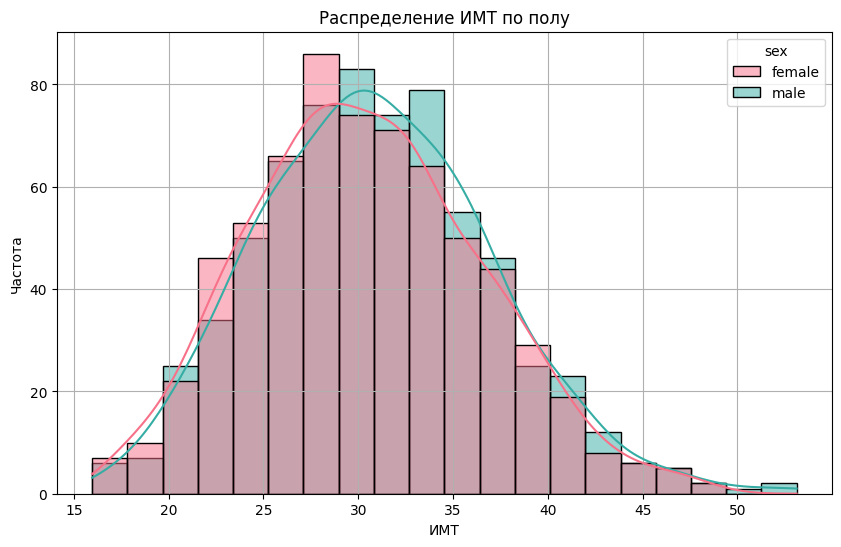

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

dataset = pd.read_csv('sex_bmi_smokers.csv')

# Количество интервалов для гистограммы
num_intervals = 20

# Вычисляем гистограмму
hist, bins = np.histogram(dataset['bmi'], bins=num_intervals)

# Рисуем гистограмму
plt.figure(figsize=(10, 6))

sns.histplot(data=dataset, x='bmi', bins=bins, hue='sex', palette="husl", kde=True)
plt.title('Распределение ИМТ по полу')
plt.xlabel('ИМТ')
plt.ylabel('Частота')
plt.grid(True)
plt.show()
